Algoritmos para modificar la tasa de aprendizaje
===

* 16:51 min | Ultima modificación: Marzo 29, 2021 | [YouTube](https://youtu.be/DEaBmI1EbNU)

In [1]:
import numpy as np

import matplotlib.pyplot as plt

## Definición del problema de optimización

Para demostrar diferentes estrategias de modificación de la tasa de aprendizaje se utilizará la siguiente función, la cual tiene un mínimo de aguja, tal como ilustra la gráfica presentada.

$$
f(x) =
\begin{cases}
    10\cdot (x-3)^2, & \text{si } |x-3| \le 0.67\\
    (x-3)^2+4,        & \text{de lo contrario}
\end{cases}
$$

In [2]:
def f(x):
    return np.where(
        abs(x - 3) <= 0.67, 10 * np.power( (x - 3), 2), np.power(x - 3, 2) + 4
    )

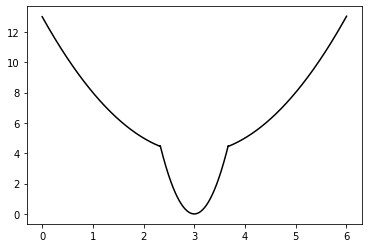

In [3]:
def plot_f():
    x_data = np.arange(0, 6.01, 0.005)
    y_data = f(x_data)
    plt.plot(x_data, y_data, "-k")


plot_f()

El gradiente de la función a optimizar es:

$$
\frac{d}{dx} f(x) =
\begin{cases}
    20 \cdot (x - 3), & \text{si } |x-3| \le 0.67\\
    2 \cdot (x - 3),  & \text{de lo contrario}
\end{cases}
$$

In [4]:
def grd(x):
    return np.where(abs(x - 3) <= 0.67, 20 * (x - 3), 2 * (x - 3))

## Tasa de aprendizaje constante

En esta estrategia, la tasa de aprendizaje ($\mu$) es constante durante todo el proceso.


Solución encontrada:
 x = 3.5119999999999996
 y = 2.6214399999999953




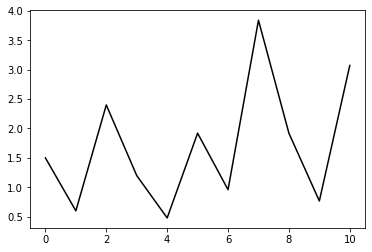

In [18]:
def learning_rate_constant(x, mu, t):
    def improve(x, mu):
        return x - mu * grd(x)

    history_x = [x]
    history_f = [f(x)]
    history_g = [mu * abs(grd(x))]

    for i in range(t):
        x = improve(x, mu)
        history_x.append(x)
        history_f.append(f(x))
        history_g.append(mu * abs(grd(x)))

    print("\nSolución encontrada:\n x = {}\n y = {}\n\n".format(x, f(x)))

    # plot_f()
    # plt.plot(history_x, history_f, "-or", linewidth=2)
    # plt.plot(
    #     history_x[0], history_f[0], "o", color="black", fillstyle="none", markersize=12
    # )
    # plt.plot(
    #     history_x[-1], history_f[-1], "o", color="red", fillstyle="none", markersize=12
    # )
    
    plt.plot(
        history_g,  color="black", fillstyle="none", markersize=12
    )
    

learning_rate_constant(x=0.5, mu=0.3, t=10)


Solución encontrada:
 x = 1.6560000000000015
 y = 5.806335999999996




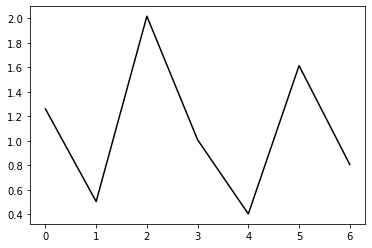

In [19]:
learning_rate_constant(x=0.9, mu=0.3, t=6)

## Escalado inverso de la tasa de aprendizaje

La tasa de aprendizaje disminuye a medida que se avanza hacia el mínimo, con el fin de poder entrar en la región de influencia del mínimo de aguja y encontra el punto óptimo.

$$\mu = \frac{\mu_0}{t^n}$$


Solución encontrada:
 x = 3.3610866482865327
 y = 1.3038356757080216




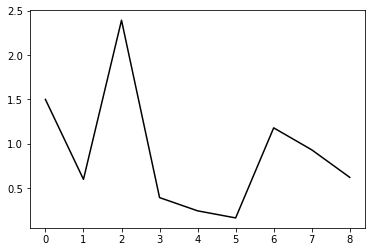

In [33]:
def learning_rate_invscaling(x, mu0, t, n):
    def improve(x, mu):
        return x - mu * grd(x)

    history_x = [x]
    history_f = [f(x)]
    history_g = [mu0 * abs(grd(x))]

    for i in range(t):
        mu = mu0 / (i + 1) ** n
        x = improve(x, mu)
        history_x.append(x)
        history_f.append(f(x))
        history_g.append(mu * abs(grd(x)))

    print("\nSolución encontrada:\n x = {}\n y = {}\n\n".format(x, f(x)))

    # plot_f()
    # plt.plot(history_x, history_f, "-or", linewidth=2)
    # plt.plot(
    #     history_x[0], history_f[0], "o", color="black", fillstyle="none", markersize=12
    # )
    # plt.plot(
    #     history_x[-1], history_f[-1], "o", color="red", fillstyle="none", markersize=12
    # )
    
    plt.plot(
        history_g,  color="black", fillstyle="none", markersize=12
    )    
    plt.show()


learning_rate_invscaling(x=0.5, mu0=0.3, t=8, n=0.6)

## Estrategia adaptativa

En esta estrategia la tasa se mantiene constante durante cierto número de iteraciones. Cuando no se puede mejorar el punto actual, la tasa de aprendizaje es dividida por una constante $k$ y se continua con el proceso de optimización.

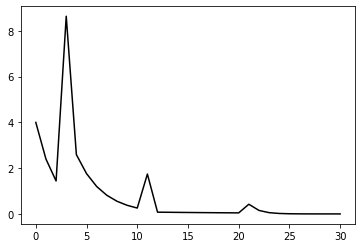

In [34]:
def learning_rate_adaptive(x, mu, t, k=5):
    def improve(x, mu):
        return x - mu * grd(x)

    history_x = [x]
    history_f = [f(x)]
    history_g = [mu * abs(grd(x))]

    for i in range(t):
        x = improve(x, mu)
        if f(x) > history_f[-1]:
            mu = mu / k
        history_x.append(x)
        history_f.append(f(x))
        history_g.append(mu * abs(grd(x)))

    # print("\nSolución encontrada:\n x = {}\n y = {}\n\n".format(x, f(x)))

    # plot_f()
    # plt.plot(history_x, history_f, "-or", linewidth=2)
    # plt.plot(
    #     history_x[0], history_f[0], "o", color="black", fillstyle="none", markersize=12
    # )
    # plt.plot(
    #     history_x[-1], history_f[-1], "o", color="red", fillstyle="none", markersize=12
    # )
    # plt.show()
    
    plt.plot(
        history_g,  color="black", fillstyle="none", markersize=12
    )  


learning_rate_adaptive(x=0.5, mu=0.8, t=30, k=5)

## Estrategia óptima

Esta es otra estrategia para disminuir el valor de la tasa de aprendizaje en cada iteración del algoritmo.

$$\mu = \frac{1}{\alpha(t + t_0)}$$

$$t_0 = \frac{1}{\alpha \times \mu_0}$$

0.7407407407407408
0.6896551724137931
0.6451612903225807
0.606060606060606
0.5714285714285714
0.5405405405405405
0.5128205128205128
0.4878048780487804
0.46511627906976744

Solución encontrada:
 x = 6.011727419273252
 y = 13.070502048002323




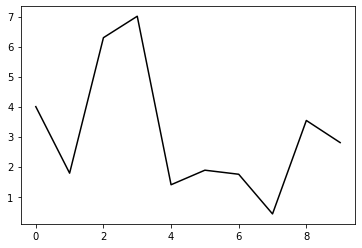

In [36]:
def learning_rate_optimal(x, mu0, t, alpha=0.001):
    def improve(x, mu):
        return x - mu * grd(x)

    history_x = [x]
    history_f = [f(x)]
    history_g = [mu0 * abs(grd(x))]

    t0 = 1 / (alpha * mu0)

    for i in range(t):
        mu = 1 / (alpha * ((i + 1) + t0))
        x = improve(x, mu)
        print(mu)
        history_x.append(x)
        history_f.append(f(x))
        history_g.append(mu * abs(grd(x)))

    print("\nSolución encontrada:\n x = {}\n y = {}\n\n".format(x, f(x)))

    # plot_f()
    # plt.plot(history_x, history_f, "-or", linewidth=2)
    # plt.plot(
    #     history_x[0], history_f[0], "o", color="black", fillstyle="none", markersize=12
    # )
    # plt.plot(
    #     history_x[-1], history_f[-1], "o", color="red", fillstyle="none", markersize=12
    # )
    # plt.show()

    plt.plot(
        history_g,  color="black", fillstyle="none", markersize=12
    )
    
    
learning_rate_optimal(x=0.5, mu0=0.8, t=9, alpha=0.1)

In [10]:
import numpy as np
import pandas as pd

X_train = np.random.random((1000, 3))
y_train = pd.get_dummies(np.argmax(X_train[:, :3], axis=1)).values
X_test = np.random.random((100, 3))
y_test = pd.get_dummies(np.argmax(X_test[:, :3], axis=1)).values

In [11]:
y_train

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)